In [ ]:
!pip install pycaret --user

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

sns.set(style="whitegrid", palette="Dark2")

from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('../../Data/Processed/Occupancy_processed.csv', parse_dates=['date'])
df.set_index('date', inplace=True)

## Divisão manual em treino-teste

In [5]:
X = df.drop(['Occupancy'], axis=1)
y = df.Occupancy

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify = df.Occupancy, test_size = 0.3, random_state = 42)

In [7]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(14392, 5) (14392,) (6168, 5) (6168,)


### Checando distribuição de classes entre as amostras

In [8]:
# checando distribuição entre as amostras
dist = pd.DataFrame(df.Occupancy.value_counts(normalize = True).values, columns = ['Dados Originais'],
                    index = df.Occupancy.value_counts().index)
dist['Treinamento'] = y_train.value_counts(normalize = True).values
dist['Teste'] = y_test.value_counts(normalize = True).values
dist

,Dados Originais,Treinamento,Teste
Empty,0.768969,0.768969,0.768969
Occupancy,0.231031,0.231031,0.231031


## Comparação de modelos com pycaret

In [16]:
from pycaret.classification import *
from pycaret.utils import enable_colab
enable_colab()

In [17]:
s = setup(data = df,
               target = 'Occupancy',
               html=False,
               session_id=42)

                    Description                   Value
0                    Session id                      42
1                        Target               Occupancy
2                   Target type                  Binary
3                Target mapping  Empty: 0, Occupancy: 1
4           Original data shape              (20560, 6)
5        Transformed data shape              (20560, 6)
6   Transformed train set shape              (14391, 6)
7    Transformed test set shape               (6169, 6)
8              Numeric features                       5
9                    Preprocess                    True
10              Imputation type                  simple
11           Numeric imputation                    mean
12       Categorical imputation                constant
13       Low variance threshold                       0
14               Fold Generator         StratifiedKFold
15                  Fold Number                      10
16                     CPU Jobs                 

In [19]:
best_model = compare_models()

                                    Model  Accuracy     AUC  Recall   Prec.  \
et                 Extra Trees Classifier    0.9932  0.9994  0.9874  0.9833   
lightgbm  Light Gradient Boosting Machine    0.9928  0.9991  0.9892  0.9798   
rf               Random Forest Classifier    0.9925  0.9994  0.9892  0.9787   
gbc          Gradient Boosting Classifier    0.9904  0.9982  0.9922  0.9672   
ada                  Ada Boost Classifier    0.9903  0.9979  0.9949  0.9642   
knn                K Neighbors Classifier    0.9898  0.9959  0.9895  0.9671   
dt               Decision Tree Classifier    0.9898  0.9858  0.9783  0.9775   
lr                    Logistic Regression    0.9894  0.9949  0.9958  0.9601   
ridge                    Ridge Classifier    0.9866  0.0000  0.9976  0.9473   
lda          Linear Discriminant Analysis    0.9864  0.9946  0.9973  0.9467   
qda       Quadratic Discriminant Analysis    0.9824  0.9948  0.9952  0.9330   
nb                            Naive Bayes    0.9673 

In [26]:
print(best_model)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=42, verbose=0, warm_start=False)


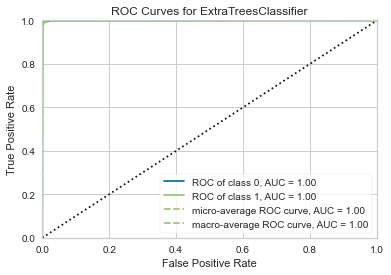

In [23]:
plot_model(best_model, plot = 'auc')

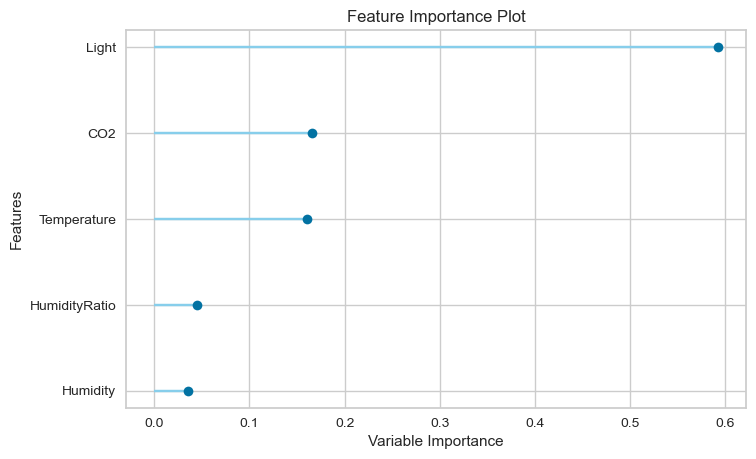

In [31]:
plot_model(best_model, plot = 'feature')

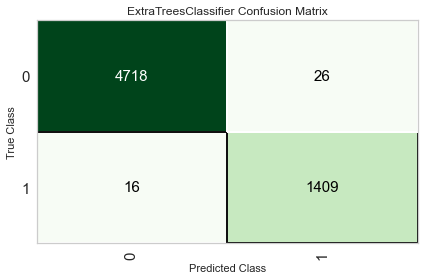

In [24]:
plot_model(best_model, plot = 'confusion_matrix')

In [25]:
predict_model(best_model)

                    Model  Accuracy     AUC  Recall  Prec.  F1   Kappa     MCC
0  Extra Trees Classifier    0.9932  0.9991       0      0   0  0.9809  0.9809


,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Label,Score
14391,20.389999,33.000000,0.0,513.0,0.004891,Empty,Empty,1.00
14392,21.700001,28.566668,0.0,582.0,0.004587,Empty,Empty,0.98
14393,20.790001,26.100000,0.0,1514.0,0.003959,Empty,Empty,1.00
14394,20.745001,27.100000,0.0,1420.0,0.004101,Empty,Empty,1.00
14395,20.500000,30.389999,0.0,749.0,0.004533,Empty,Empty,1.00
...,...,...,...,...,...,...,...,...
20555,20.600000,22.533333,0.0,635.0,0.003375,Empty,Empty,1.00
20556,20.000000,35.700001,0.0,539.0,0.005168,Empty,Empty,1.00
20557,19.290001,31.000000,6.0,436.5,0.004288,Empty,Empty,1.00
20558,20.200001,21.200001,0.0,444.0,0.003097,Empty,Empty,1.00
